In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('wholesale_clients.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
data = data.iloc[:,2:]
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
data_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [ ]:
data_scaled.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [ ]:
from sklearn.cluster import KMeans
inertia_values = []
for k in range(2,16):
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

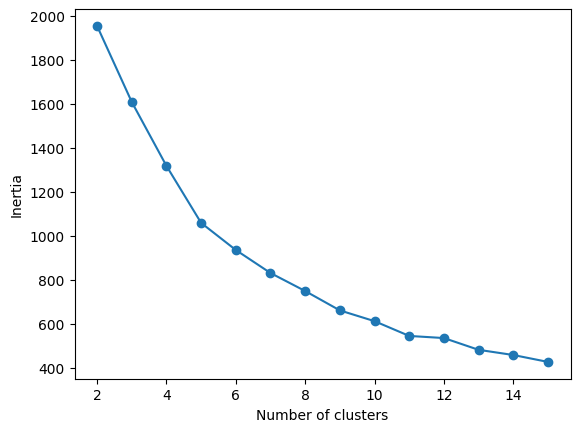

In [ ]:
import matplotlib.pyplot as plt
inertia_series = pd.Series(inertia_values,index=range(2,16))
inertia_series.plot(marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans_5 = KMeans(n_clusters=5,n_init='auto',random_state=42)
kmeans_5.fit(data_scaled)
kmeans_5.labels_

array([3, 0, 0, 3, 1, 3, 3, 3, 3, 0, 0, 3, 1, 0, 0, 3, 0, 3, 3, 3, 3, 3,
       1, 2, 0, 3, 3, 3, 0, 1, 3, 3, 3, 1, 3, 0, 1, 0, 0, 1, 1, 3, 0, 0,
       0, 0, 0, 2, 0, 0, 3, 3, 1, 0, 1, 3, 2, 0, 3, 3, 3, 2, 3, 0, 3, 2,
       3, 0, 3, 3, 1, 1, 3, 1, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 2, 2, 1,
       3, 1, 3, 3, 2, 1, 0, 3, 3, 3, 3, 3, 0, 0, 3, 1, 3, 3, 0, 0, 3, 0,
       3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 0, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0,
       1, 3, 3, 3, 3, 1, 0, 4, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 1, 0,
       3, 3, 0, 0, 1, 3, 3, 0, 3, 3, 3, 0, 3, 2, 3, 3, 0, 0, 0, 3, 0, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 2, 3, 1, 0, 1, 3, 3, 1, 1, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
from collections import Counter
Counter(kmeans_5.labels_)

Counter({np.int32(3): 272,
         np.int32(0): 96,
         np.int32(1): 59,
         np.int32(2): 11,
         np.int32(4): 2})

In [ ]:
cluster_centers = pd.DataFrame(kmeans_5.cluster_centers_,columns=data_scaled.columns)
cluster_centers.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.513819,0.645602,0.898265,-0.340638,0.906661,0.047542
1,1.756386,-0.128282,-0.219258,0.854505,-0.404341,0.343259
2,0.388729,3.943049,4.021646,0.035784,4.226116,0.941636
3,-0.228613,-0.384003,-0.439045,-0.135764,-0.399918,-0.195230
4,1.803356,3.332987,0.942519,9.409801,-0.446409,8.964157


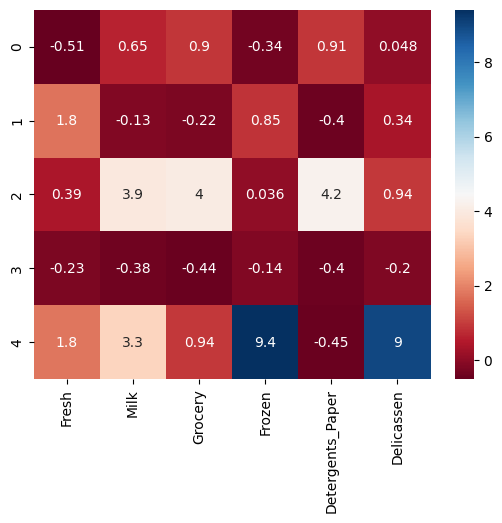

In [ ]:
import seaborn as sns
sns.heatmap(cluster_centers,cmap='RdBu',annot=True)
plt.show()

###. Cluster 0: More Milk, Grocery ar Paper Items
###. Cluster 1: More Fresh and Frozen Items
###. Cluster 2: More of Everything
###. Cluster 3: Little of Everything
###. Cluster 4: Lots of Frozen + Delicassen Items

In [ ]:
from sklearn.metrics import silhouette_score
sh_score = []
for k in range(2,16):
    kmeans = KMeans(n_clusters=k,n_init=100)
    kmeans.fit(data_scaled)
    sh_score.append(silhouette_score(data_scaled,kmeans.labels_,metric='euclidean',sample_size=None))

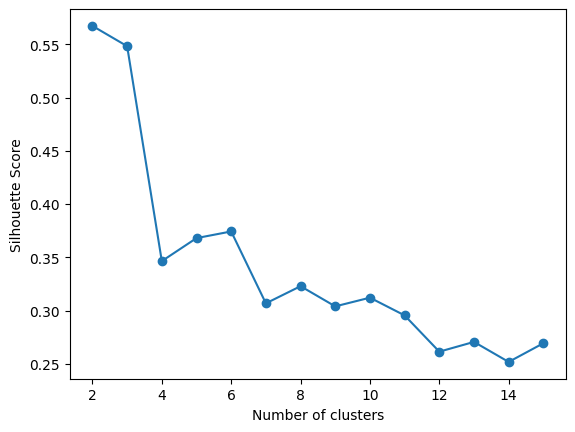

In [ ]:
sh_series = pd.Series(sh_score,index=range(2,16))
sh_series.plot(marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
kmeans_2 = KMeans(n_clusters=2,n_init='auto',random_state=42)
kmeans_2.fit(data_scaled)
Counter(kmeans_2.labels_)

Counter({np.int32(0): 373, np.int32(1): 67})

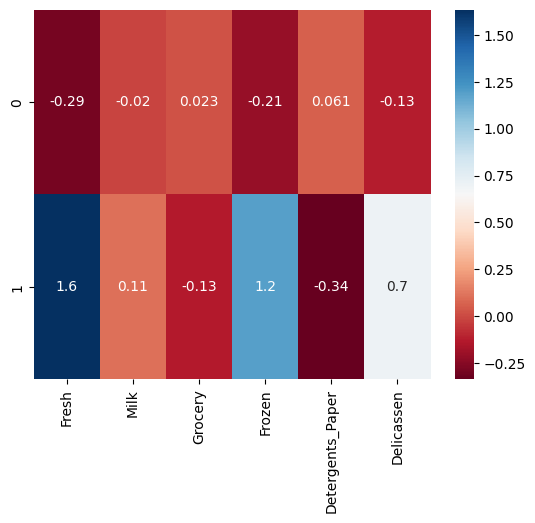

In [ ]:
cluster_centers_2 = pd.DataFrame(kmeans_2.cluster_centers_,columns=data_scaled.columns)
sns.heatmap(cluster_centers_2,cmap='RdBu',annot=True)
plt.show()

### cluster 0 :-- Typical Clients
### cluster 1 :-- More Fresh, Frozen, and Deli items

In [ ]:
kmeans_3 = KMeans(n_clusters=3,n_init='auto',random_state=42)
kmeans_3.fit(data_scaled)
labels = kmeans_3.labels_.astype(np.int32)
cluster_counts = Counter(labels)
for cluster_label, count in cluster_counts.items():
    print(f"Cluster {cluster_label}: {count}")

Cluster 0: 350
Cluster 1: 53
Cluster 2: 37


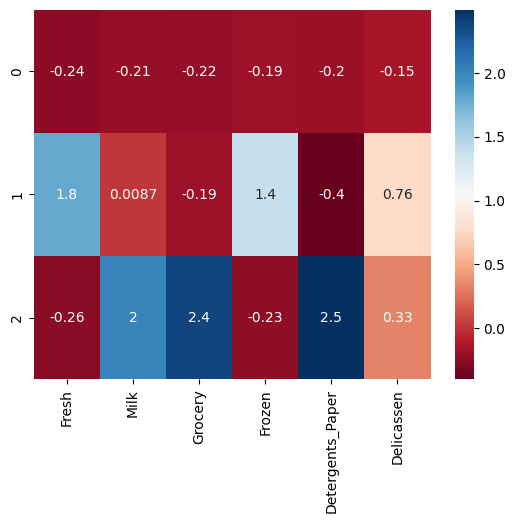

In [ ]:
cluster_centers_3 = pd.DataFrame(kmeans_3.cluster_centers_,columns=data_scaled.columns)
sns.heatmap(cluster_centers_3,cmap='RdBu',annot=True)
plt.show()

### cluster 0 :-- Typical Clients
### cluster 1 :-- More Fresh and Deli Items
### cluster 2 :-- More milk grocery and paper items

## Hierarchical Clustering

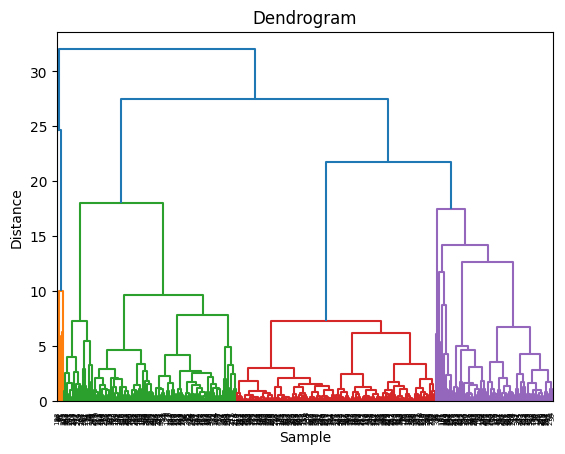

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(data_scaled,method='ward')
dendrogram_info=dendrogram(linkage_matrix, color_threshold=20)
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg_5 = AgglomerativeClustering(n_clusters=5)
agg_5.fit(data_scaled)
Counter(agg_5.labels_)

Counter({np.int64(0): 153,
         np.int64(4): 177,
         np.int64(2): 104,
         np.int64(1): 5,
         np.int64(3): 1})

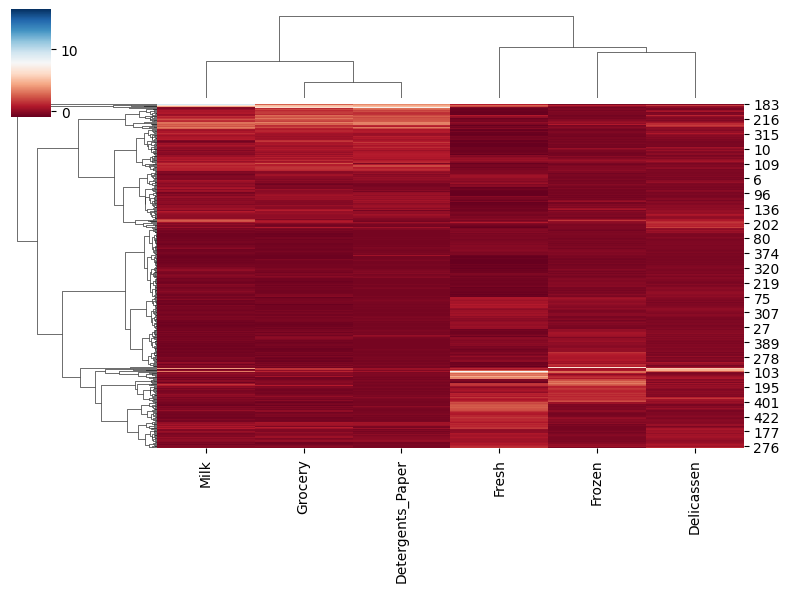

In [ ]:
sns.clustermap(
    data_scaled,
    cmap='RdBu',
    method='ward',
    figsize=(8, 6),
    xticklabels=data_scaled.columns
)

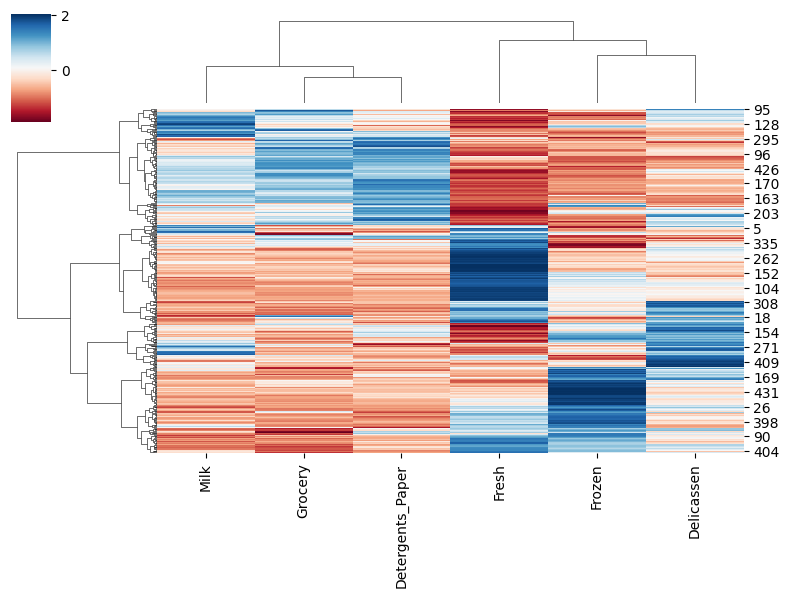

In [ ]:
sns.clustermap(
    data_scaled,
    cmap='RdBu',
    method='ward',
    figsize=(8, 6),
    xticklabels=data_scaled.columns, z_score=0
)

In [ ]:
row_means = data_scaled.mean(axis=1)
row_std = data_scaled.std(axis=1)
data_scaled_zscore = (data_scaled.subtract(row_means, axis=0)).divide(row_std, axis=0)
data_scaled_zscore.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.226470,1.554663,-0.038946,-1.586185,-0.045871,-0.110132
1,-1.285281,1.515302,0.395561,-0.922651,0.144427,0.152640
2,-0.838979,0.048198,-0.404631,-0.518050,-0.237279,1.950740
3,0.417555,-1.050725,-0.582252,1.607848,-0.796394,0.403969
4,0.846251,-0.619745,-0.664022,-0.248161,-0.914577,1.600254


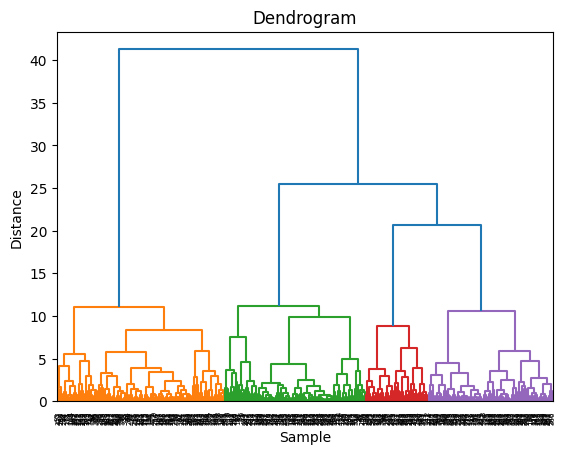

In [ ]:
linkage_matrix_z = linkage(data_scaled_zscore,method='ward')
dendrogram_info_z=dendrogram(linkage_matrix_z, color_threshold=15)
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

In [ ]:
data_points_z = pd.Series(dendrogram_info_z['ivl'],name='Data point').astype(int)
data_points_z.head()

,Data point
0,95
1,317
2,430
3,184
4,266


In [ ]:
data_points = pd.Series(dendrogram_info['ivl'],name='Data point').astype(int)
data_points.head()

,Data point
0,183
1,86
2,47
3,61
4,85


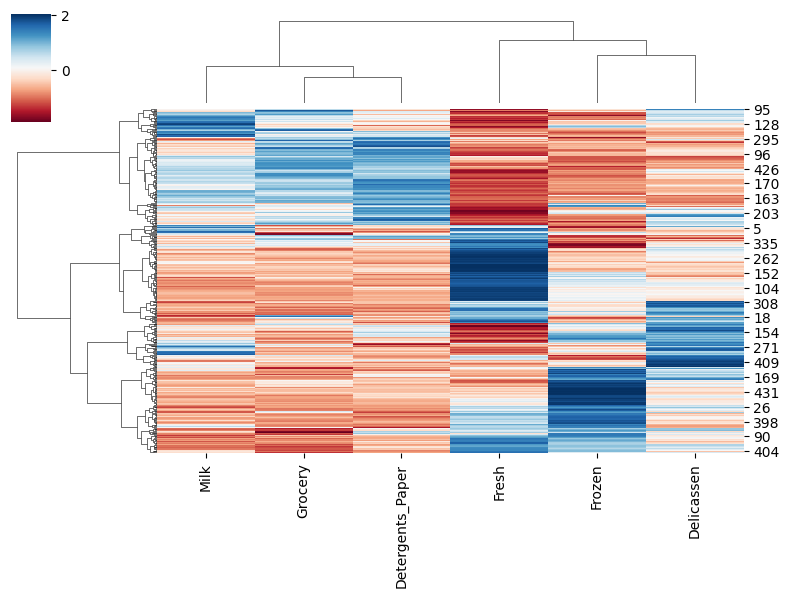

In [ ]:
sns.clustermap(
    data_scaled,
    cmap='RdBu',
    method='ward',
    figsize=(8, 6),
    xticklabels=data_scaled.columns,
    z_score=0
)

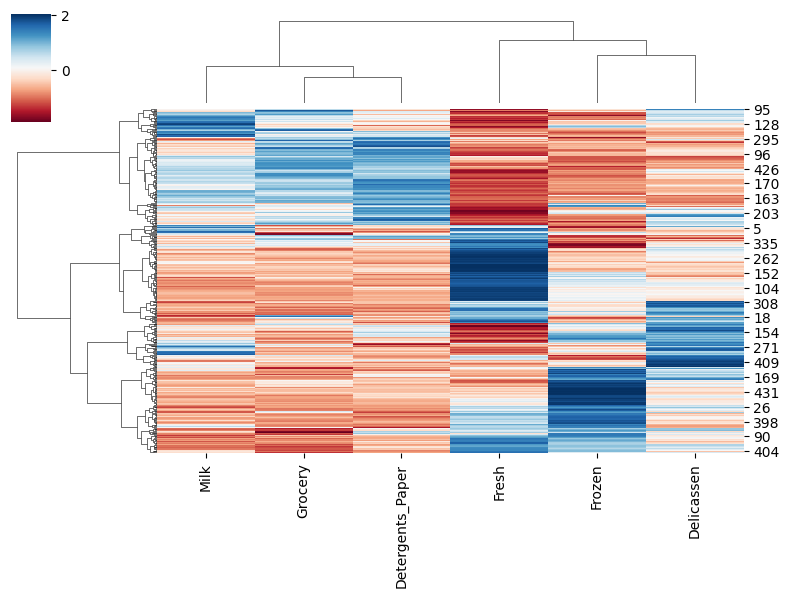

In [ ]:
sns.clustermap(
    data_scaled_zscore,
    cmap='RdBu',
    method='ward',
    figsize=(8, 6),
    xticklabels=data_scaled.columns
)

#**Cluster**

In [ ]:
agg_4_z = AgglomerativeClustering(n_clusters=4)
agg_4_z.fit(data_scaled_zscore)
Counter(agg_4_z.labels_)

Counter({np.int64(0): 125,
         np.int64(1): 149,
         np.int64(3): 56,
         np.int64(2): 110})

In [ ]:
agg_silhouette_score = {}
for n in range(2,21):
    agg_cluster = AgglomerativeClustering(n_clusters=n)
    agg_cluster.fit(data_scaled)
    agg_silhouette_score[n] = silhouette_score(data_scaled,agg_cluster.labels_,metric='euclidean',sample_size=None)
agg_silhouette_score

{2: np.float64(0.7924572758342273),
 3: np.float64(0.2646091480214908),
 4: np.float64(0.2670148241989557),
 5: np.float64(0.23988371669170097),
 6: np.float64(0.23424990872738188),
 7: np.float64(0.24405686464597856),
 8: np.float64(0.2520384687343341),
 9: np.float64(0.27202620570114383),
 10: np.float64(0.27954261064916225),
 11: np.float64(0.28015398902140587),
 12: np.float64(0.24562381160303043),
 13: np.float64(0.24647695283235932),
 14: np.float64(0.22903049767293357),
 15: np.float64(0.2308407937114372),
 16: np.float64(0.18896719179943278),
 17: np.float64(0.1959949281863608),
 18: np.float64(0.1954950889983609),
 19: np.float64(0.20219343087967662),
 20: np.float64(0.20160566549699505)}

In [ ]:
agg_2 = AgglomerativeClustering(n_clusters=2)
agg_2.fit(data_scaled)
Counter(agg_2.labels_)

Counter({np.int64(0): 434, np.int64(1): 6})

# **Dbscan**

In [ ]:
def dbscan_data(data):
    import numpy as np
    import pandas as pd
    from sklearn.cluster import DBSCAN
    from sklearn.metrics import silhouette_score

    results = []

    # Define parameter ranges
    eps_values = np.arange(0.1, 2, 0.1)
    min_samples_values = np.arange(2, 10, 1)

    # Grid search for best eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_

            # Count number of clusters (ignoring noise points)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            noise_point = list(labels).count(-1)

            # Compute silhouette score only if there are at least 2 clusters
            if n_clusters > 1:
                score = silhouette_score(data, labels, metric='euclidean')
            else:
                score = None

            results.append([eps, min_samples, n_clusters, noise_point, score])

    # Create a DataFrame with results
    dbscan_results = pd.DataFrame(results, columns=[
        'eps', 'min_samples', 'n_clusters', 'noise_point', 'silhouette_score'
    ])

    # Return the first few rows
    return dbscan_results

In [ ]:
dbscan_result_1=dbscan_data(data_scaled)
dbscan_result_1.head()

,eps,min_samples,n_clusters,noise_point,silhouette_score
0,0.1,2,8,423,-0.393
1,0.1,3,1,437,NaN
2,0.1,4,0,440,NaN
3,0.1,5,0,440,NaN
4,0.1,6,0,440,NaN


In [ ]:
dbscan_result_1.sort_values(by='silhouette_score', ascending=False).groupby('silhouette_score').head(1).head()

,eps,min_samples,n_clusters,noise_point,silhouette_score
136,1.8,2,2,13,0.581583
122,1.6,4,2,24,0.578543
96,1.3,2,3,25,0.424572
105,1.4,3,3,23,0.423547
113,1.5,3,3,21,0.421271


In [ ]:
def dbscan_data_2(data):
    import numpy as np
    import pandas as pd
    from sklearn.cluster import DBSCAN
    from sklearn.metrics import silhouette_score

    results = []

    # Define parameter ranges
    eps_values = np.arange(0.1, 5, 0.1)
    min_samples_values = np.arange(2, 10, 1)

    # Grid search for best eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_

            # Count number of clusters (ignoring noise points)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            noise_point = list(labels).count(-1)

            # Compute silhouette score only if there are at least 2 clusters
            if n_clusters > 1:
                score = silhouette_score(data, labels, metric='euclidean')
            else:
                score = None

            results.append([eps, min_samples, n_clusters, noise_point, score])

    # Create a DataFrame with results
    dbscan_results = pd.DataFrame(results, columns=[
        'eps', 'min_samples', 'n_clusters', 'noise_point', 'silhouette_score'
    ])

    # Return the first few rows
    return dbscan_results

In [ ]:
dbscan_result_2=dbscan_data_2(data_scaled)
dbscan_result_2.head()

,eps,min_samples,n_clusters,noise_point,silhouette_score
0,0.1,2,8,423,-0.393
1,0.1,3,1,437,NaN
2,0.1,4,0,440,NaN
3,0.1,5,0,440,NaN
4,0.1,6,0,440,NaN


In [ ]:
dbscan_result_2.sort_values(by='silhouette_score', ascending=False).groupby('silhouette_score').head(1).head()

,eps,min_samples,n_clusters,noise_point,silhouette_score
256,3.3,2,2,8,0.740284
200,2.6,2,2,10,0.582247
136,1.8,2,2,13,0.581583
122,1.6,4,2,24,0.578543
240,3.1,2,3,8,0.577890


In [ ]:
from sklearn.cluster import DBSCAN
dbscan_final = DBSCAN(eps=3.3, min_samples=2)
dbscan_final.fit(data_scaled)
dbscan_final.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [ ]:
from collections import Counter
Counter(dbscan_final.labels_)

Counter({np.int64(0): 430, np.int64(-1): 8, np.int64(1): 2})

In [ ]:
def print_metrics(model, data):
  print(model)
  print(Counter(model.labels_))
  print(silhouette_score(data,model.labels_,metric='euclidean',sample_size=None))

In [ ]:
print_metrics(kmeans_3,data_scaled)

KMeans(n_clusters=3, random_state=42)
Counter({np.int32(0): 350, np.int32(1): 53, np.int32(2): 37})
0.4582633767207058


In [ ]:
print_metrics(kmeans_5,data_scaled)

KMeans(n_clusters=5, random_state=42)
Counter({np.int32(3): 272, np.int32(0): 96, np.int32(1): 59, np.int32(2): 11, np.int32(4): 2})
0.36890127429678043


In [ ]:
print_metrics(agg_2,data_scaled)

AgglomerativeClustering()
Counter({np.int64(0): 434, np.int64(1): 6})
0.7924572758342273


In [ ]:
print_metrics(agg_5,data_scaled)

AgglomerativeClustering(n_clusters=5)
Counter({np.int64(4): 177, np.int64(0): 153, np.int64(2): 104, np.int64(1): 5, np.int64(3): 1})
0.23988371669170097


In [ ]:
print_metrics(agg_4_z,data_scaled_zscore)

AgglomerativeClustering(n_clusters=4)
Counter({np.int64(1): 149, np.int64(0): 125, np.int64(2): 110, np.int64(3): 56})
0.3427681898594439


In [ ]:
print_metrics(dbscan_final,data_scaled)

DBSCAN(eps=3.3, min_samples=2)
Counter({np.int64(0): 430, np.int64(-1): 8, np.int64(1): 2})
0.740283564230615


In [ ]:
kmeans_3 = KMeans(n_clusters=3,n_init='auto',random_state=42)
kmeans_3.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
Counter(kmeans_3.labels_)

Counter({np.int32(0): 350, np.int32(1): 53, np.int32(2): 37})

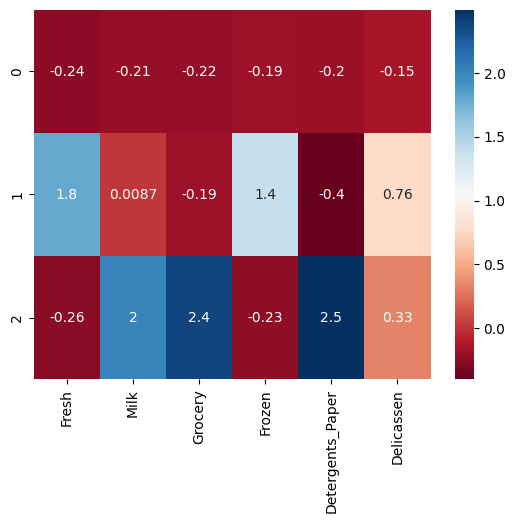

In [ ]:
cluster_centers_3 = pd.DataFrame(kmeans_3.cluster_centers_,columns=data_scaled.columns)
sns.heatmap(cluster_centers_3,cmap='RdBu',annot=True)
plt.show()

# 0---Typical Clients
# 1---More Fresh and Frozen items
# 2---More milk grocery and paper items

In [ ]:
new_client = pd.DataFrame([np.array([15000,15000,30000,500,15000,2000])],columns=data.columns)
new_client

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,15000,15000,30000,500,15000,2000


In [ ]:
new_client_scales = pd.DataFrame(scaler.transform(new_client),columns=data.columns)
new_client_scales

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.237451,1.248474,2.322787,-0.530388,2.544604,0.168671


In [ ]:
kmeans_3.predict(new_client_scales)

array([2], dtype=int32)